In [1]:
import pandas as pd
import MFLibrary as mf
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

# gameid has bad data == 253240066

#team 1 is the away team
# 0.25, 0.5, 0.75,
quants = [0.05, 0.95]

In [2]:
# conn = sqlite3.connect('C:\Dropbox\Dropbox\HAXz\CBBTO\cbb.db')
# curr = conn.cursor()
# result = curr.execute("SELECT * FROM playbyplay where gameid = 253360041")
# for row in result:
#     print(row)
# conn.close()

In [3]:
# conn = sqlite3.connect('C:\Dropbox\Dropbox\HAXz\CBBTO\cbb.db')
# curr = conn.cursor()
# result = curr.execute("SELECT DISTINCT gameid FROM playbyplay where gameid != '253240066'")

# gameids = []
# for elem in result:
#     gameids.append(elem[0])
    
# conn.close()

In [4]:
conn = sqlite3.connect('C:\Dropbox\Dropbox\HAXz\CBBTO\cbb.db')
curr = conn.cursor()
# Exclude free throws (give inf will still be accounted for in runs) and bad data
# end of halfs/OT (time < 90) handled elsewhere
data = pd.read_sql_query("""SELECT rowid,* 
                         FROM playbyplay 
                         WHERE event like '% made %' 
                         AND event not like '%Free Throw%' 
                         AND gameid not in ('253240066', '253510006', '260692440', '283190221',
                         '283192166', '283190201', '293170264', '283342390', '293172633')""", conn)
conn.close()

data = data.apply(pd.to_numeric,errors='ignore')
data.head()

,rowid,gameid,event,team1,team2,score1,score2,time
0,7,253130183,Demetris Nichols made Three Point Jumper.,COR,SYR,0,3,1157
1,29,253130183,Louie McCroskey made Two Point Layup.,COR,SYR,0,5,1036
2,34,253130183,Darryl Watkins made Two Point Layup.,COR,SYR,0,7,988
3,65,253130183,Adam Gore made Two Point Jumper.,COR,SYR,4,11,814
4,66,253130183,Darryl Watkins made Two Point Jumper.,COR,SYR,4,13,785


In [5]:
data['scorediff'] = data['score1'] - data['score2']
diffs1 = data[['scorediff','time']].diff(1)
diffs2 = data[['scorediff','time']].diff(2)
diffs3 = data[['scorediff','time']].diff(3)
diffs4 = data[['scorediff','time']].diff(4)
diffs5 = data[['scorediff','time']].diff(5)

diffs1['rowid'] = data['rowid']
diffs1['gameid'] = data['gameid']
diffs1['event'] = data['event']
diffs5['timedelta'] = -diff['time']
diffs5['time'] = data['time']

diffs2['rowid'] = data['rowid']
diffs2['gameid'] = data['gameid']
diffs2['event'] = data['event']
diffs5['timedelta'] = -diff['time']
diffs5['time'] = data['time']

diffs3['rowid'] = data['rowid']
diffs3['gameid'] = data['gameid']
diffs3['event'] = data['event']
diffs5['timedelta'] = -diff['time']
diffs5['time'] = data['time']

diffs4['rowid'] = data['rowid']
diffs4['gameid'] = data['gameid']
diffs4['event'] = data['event']
diffs5['timedelta'] = -diff['time']
diffs5['time'] = data['time']

diffs5['rowid'] = data['rowid']
diffs5['gameid'] = data['gameid']
diffs5['event'] = data['event']
diffs5['timedelta'] = -diff['time']
diffs5['time'] = data['time']

In [6]:
diffs1.head()

,score1,score2,time,scorediff,rowid,gameid,event
0,NaN,NaN,NaN,-3,7,253130183,Demetris Nichols made Three Point Jumper.
1,0.0,2.0,-121.0,-5,29,253130183,Louie McCroskey made Two Point Layup.
2,0.0,2.0,-48.0,-7,34,253130183,Darryl Watkins made Two Point Layup.
3,4.0,4.0,-174.0,-7,65,253130183,Adam Gore made Two Point Jumper.
4,0.0,2.0,-29.0,-9,66,253130183,Darryl Watkins made Two Point Jumper.


In [7]:
diffs1['scoredelta'] = 60 * diffs1['scorediff'] / -diffs1['time']
diffs2['scoredelta'] = 60 * diffs2['scorediff'] / -diffs2['time']
diffs3['scoredelta'] = 60 * diffs3['scorediff'] / -diffs3['time']
diffs4['scoredelta'] = 60 * diffs4['scorediff'] / -diffs4['time']
diffs5['scoredelta'] = 60 * diffs5['scorediff'] / -diffs5['time']

In [8]:
#Make sure there are no NaN
diffs1.loc[diffs1['scoredelta']==np.nan]

,score1,score2,time,scorediff,rowid,gameid,event,scoredelta


In [9]:
# Check out inf values in first and second diff
diffs1.sort_values("scoredelta").head()

,score1,score2,time,scorediff,rowid,gameid,event,scoredelta
176,0.0,2.0,0.0,9,1215,253210333,Brandon Hollinger made Two Point Layup. Assis...,-inf
2347,2.0,0.0,0.0,11,14077,253222426,Roy Hibbert made Two Point Layup.,-inf
1938,2.0,0.0,0.0,4,11887,253320235,Josh Goodwin made Two Point Jumper.,-inf
1627,0.0,3.0,0.0,2,10146,253300277,Mike Gansey made Three Point Jumper.,-inf
2558,3.0,0.0,0.0,5,15359,253250251,J.D. Collins made Three Point Jumper. Assiste...,-inf


In [10]:
# Instantaneous 690 ppm
data.loc[data['gameid']==253310120].head()

,rowid,gameid,event,team1,team2,score1,score2,time
721,4415,253310120,Ekene Ibekwe made Two Point Jumper.,NICH,MD,0,2,1189
722,4416,253310120,Stefan Blaszczynski made Three Point Jumper.,NICH,MD,3,2,1158
723,4417,253310120,Ekene Ibekwe made Two Point Jumper.,NICH,MD,3,4,1134
724,4419,253310120,Stefan Blaszczynski made Two Point Layup.,NICH,MD,5,4,1120
725,4424,253310120,D.J. Strawberry made Two Point Layup. Assiste...,NICH,MD,5,6,1067


In [11]:
diffs1.sort_values("scoredelta").tail()

,score1,score2,time,scorediff,rowid,gameid,event,scoredelta
2462,0.0,2.0,0.0,-10,14831,253220135,Vincent Grier made Two Point Layup.,inf
3811,0.0,3.0,0.0,-5,22538,253340120,Travis Garrison made Two Point Layup.,inf
184,0.0,2.0,0.0,-12,1292,253200251,LaMarcus Aldridge made Two Point Layup. Assis...,inf
0,NaN,NaN,NaN,-3,7,253130183,Demetris Nichols made Three Point Jumper.,NaN
2010,3.0,0.0,0.0,0,12299,253220057,Demetris Nichols made Three Point Jumper. Ass...,NaN


In [12]:
diffs2.sort_values("scoredelta").head()

,score1,score2,time,scorediff,rowid,gameid,event,scoredelta
569,2.0,5.0,-16.0,-39,3600,253250084,Kyle Taber made Two Point Layup. Assisted by ...,-146.250000
823,2.0,5.0,-24.0,-40,4895,253290264,Artem Wallace made Two Point Layup.,-100.000000
822,2.0,5.0,-25.0,-40,4890,253290264,Ryan Appleby made Three Point Jumper.,-96.000000
3230,1.0,4.0,-22.0,-35,19159,253260356,Warren Carter made Two Point Layup.,-95.454545
3982,3.0,2.0,-23.0,-35,23516,253340235,Kareem Cooper made Two Point Layup. Assisted ...,-91.304348


In [13]:
diffs2.sort_values("scoredelta").tail()

,score1,score2,time,scorediff,rowid,gameid,event,scoredelta
176,2.0,2.0,-3.0,9,1215,253210333,Brandon Hollinger made Two Point Layup. Assis...,180.000000
185,2.0,2.0,0.0,-10,1293,253200251,Jerry Smith made Two Point Layup. Assisted by...,inf
2463,0.0,4.0,0.0,-12,14832,253220135,Adam Boone made Two Point Layup.,inf
0,NaN,NaN,NaN,-3,7,253130183,Demetris Nichols made Three Point Jumper.,NaN
1,NaN,NaN,NaN,-5,29,253130183,Louie McCroskey made Two Point Layup.,NaN


In [14]:
# 253200251  9:37 left in the first

In [15]:
# diffs1 = diffs1.replace([np.inf, -np.inf], np.nan)
# diffs2 = diffs2.replace([np.inf, -np.inf], np.nan)
# diffs3 = diffs3.replace([np.inf, -np.inf], np.nan)
# diffs4 = diffs4.replace([np.inf, -np.inf], np.nan)
# diffs5 = diffs5.replace([np.inf, -np.inf], np.nan)
diffs1 = diffs1[['rowid','gameid','event','time', 'scoredelta','scorediff']].dropna()
diffs2 = diffs2[['rowid','gameid','event','time', 'scoredelta','scorediff']].dropna()
diffs3 = diffs3[['rowid','gameid','event','time', 'scoredelta','scorediff']].dropna()
diffs4 = diffs4[['rowid','gameid','event','time', 'scoredelta','scorediff']].dropna()
diffs5 = diffs5[['rowid','gameid','event','time', 'scoredelta','scorediff']].dropna()

In [16]:
print("DIFF1")
print("++++++++++")
print(diffs1['scoredelta'].describe())
diffs1['scoredelta'].quantile(quants)


DIFF1
++++++++++
count    3998.000000
mean             NaN
std              NaN
min             -inf
25%       -20.988095
50%        -5.217391
75%         2.370414
max              inf
Name: scoredelta, dtype: float64


0.05   -76.363636
0.95    25.123031
Name: scoredelta, dtype: float64

In [17]:

print("DIFF2")
print("++++++++++")
print(diffs2['scoredelta'].describe())
print(diffs2['scoredelta'].quantile(quants))
print("DIFF3")
print("++++++++++")
print(diffs3['scoredelta'].describe())
print(diffs3['scoredelta'].quantile(quants))
print("DIFF4")
print("++++++++++")
print(diffs4['scoredelta'].describe())
print(diffs4['scoredelta'].quantile(quants))
print("DIFF5")
print("++++++++++")
print(diffs5['scoredelta'].describe())
print(diffs5['scoredelta'].quantile(quants))

DIFF2
++++++++++
count    3998.000000
mean             inf
std              NaN
min      -146.250000
25%        -9.230769
50%        -2.275604
75%         1.052632
max              inf
Name: scoredelta, dtype: float64
0.05   -27.567568
0.95     9.677419
Name: scoredelta, dtype: float64
DIFF3
++++++++++
count    3997.000000
mean       -2.919635
std         7.455116
min       -67.272727
25%        -5.660377
50%        -1.259843
75%         0.746888
max        44.571429
Name: scoredelta, dtype: float64
0.05   -16.439286
0.95     6.096670
Name: scoredelta, dtype: float64
DIFF4
++++++++++
count    3996.000000
mean       -2.018068
std         5.185434
min       -43.636364
25%        -4.077670
50%        -0.813597
75%         0.592300
max        33.600000
Name: scoredelta, dtype: float64
0.05   -11.435065
0.95     4.366477
Name: scoredelta, dtype: float64
DIFF5
++++++++++
count    3995.000000
mean             inf
std              NaN
min       -32.000000
25%        -3.119780
50%        -0.508

In [18]:
diffs5.sort_values("scoredelta").head()

,rowid,gameid,event,time,scoredelta,scorediff
823,4895,253290264,Artem Wallace made Two Point Layup.,-75.0,-32.000000,-40
822,4890,253290264,Ryan Appleby made Three Point Jumper.,-76.0,-31.578947,-40
570,3601,253250084,Glen Elliott made Two Point Layup.,-92.0,-24.130435,-37
819,4877,253290264,Dustin Brown made Two Point Jumper.,-94.0,-21.702128,-34
569,3600,253250084,Kyle Taber made Two Point Layup. Assisted by ...,-108.0,-21.666667,-39


In [19]:
diffs5.sort_values("scoredelta").tail()

,rowid,gameid,event,time,scoredelta,scorediff
1782,10989,253302710,NaVonta Kentle made Three Point Jumper.,-101.0,16.039604,27
1783,10990,253302710,Marshall Strickland made Three Point Jumper. ...,-109.0,16.513761,30
1781,10988,253302710,Roderick Wilmont made Two Point Layup. Assist...,-107.0,16.822430,30
1780,10982,253302710,Fred Oguns made Two Point Layup.,-83.0,18.795181,26
2967,17694,253270127,Mustafa Shakur made Two Point Layup.,0.0,inf,-1


In [20]:
# 253270127 - edge case time is perfectly aligned with time of score-5 in previous period (173 s) Marcus Williams made Two Point Dunk Shot.
data.loc[data['gameid']==253270127].head()

,rowid,gameid,event,team1,team2,score1,score2,time
2919,17421,253270127,Kirk Walters made Two Point Jumper. Assisted ...,ARIZ,MSU,2,0,1178
2920,17422,253270127,Chris Rodgers made Two Point Layup.,ARIZ,MSU,4,0,1154
2921,17423,253270127,Maurice Ager made Two Point Layup. Assisted b...,ARIZ,MSU,4,2,1124
2922,17428,253270127,Maurice Ager made Two Point Layup.,ARIZ,MSU,4,4,1099
2923,17432,253270127,Shannon Brown made Two Point Jumper. Assisted...,ARIZ,MSU,4,6,1075


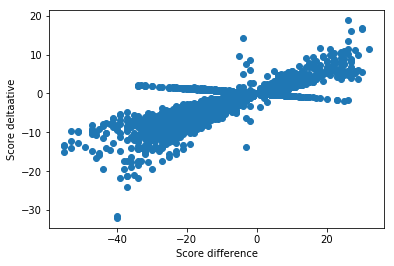

In [21]:
plt.scatter(diffs5['scorediff'],diffs5['scoredelta'])
plt.xlabel('Score difference')
plt.ylabel('Score deltaative')
plt.show()

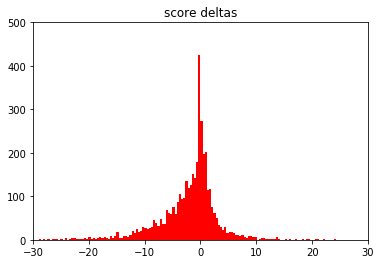

In [22]:
fig = plt.figure()
plt.ylim([0,500])
plt.xlim([-30,30])
#plt.hist(test['delta1'],bins=20, label='team2')
#plt.hist(test['delta2'], bins=20, color='y', alpha= 0.5, label='team2')
plt.hist(diffs4['scoredelta'], bins=200, color='r', alpha=1, label='diff')
plt.title("score deltas")
plt.show() 

      rowid     gameid                                              event  \
3936  23257  253340235        Darius Washington Jr. made Two Point Layup.   
3937  23261  253340235                 Julius Young made Two Point Layup.   
3938  23266  253340235                  Joey Dorsey made Two Point Layup.   
3939  23270  253340235              Catraiva Givens made Two Point Layup.   
3940  23271  253340235  Darius Washington Jr. made Three Point Jumper....   
3941  23272  253340235  Antonio Anderson made Three Point Jumper.  Ass...   
3942  23284  253340235  Rodney Carney made Three Point Jumper.  Assist...   
3943  23297  253340235  Antonio Anderson made Three Point Jumper.  Ass...   
3944  23306  253340235  Shawne Williams made Three Point Jumper.  Assi...   
3945  23313  253340235  Robert Dozier made Two Point Dunk Shot.  Assis...   
3946  23318  253340235           Clinton Johnson made Three Point Jumper.   
3947  23320  253340235           Clinton Johnson made Three Point Jumper.   

,rowid,gameid,scorediff,time,timedelta,scorediffdelta,normedscorediffdelta
count,3102.000000,3.102000e+03,3102.000000,3102.000000,3102.00000,3102.000000,3102.000000
mean,12050.566731,2.532632e+08,-6.498388,508.390393,229.17666,-1.211476,-0.332521
std,6745.210482,5.318493e+04,12.900151,286.553215,82.67512,4.642848,1.339187
min,73.000000,2.531202e+08,-55.000000,1.000000,70.00000,-19.000000,-8.089888
25%,6208.000000,2.532204e+08,-14.000000,269.000000,169.00000,-4.000000,-1.165049
50%,12230.500000,2.532603e+08,-5.000000,507.500000,216.00000,-1.000000,-0.381559
75%,17950.500000,2.533027e+08,2.000000,746.000000,278.00000,2.000000,0.542986
max,23606.000000,2.533701e+08,32.000000,1086.000000,624.00000,16.000000,6.000000


,rowid,gameid,event,scorediff,time,timedelta,scorediffdelta,normedscorediffdelta
754,4563,253310120,Ekene Ibekwe made Two Point Dunk Shot.,-23,1086,89.0,-12.0,-8.089888
1993,12220,253320235,Rodney Carney made Three Point Jumper. Assist...,-27,332,134.0,-14.0,-6.268657
755,4571,253310120,James Gist made Two Point Dunk Shot.,-25,1009,136.0,-12.0,-5.294118
3214,19059,253260356,Brian Randle made Two Point Dunk Shot. Assist...,-25,933,92.0,-8.0,-5.217391
3924,23156,253342250,Adam Morrison made Two Point Layup.,-22,575,135.0,-11.0,-4.888889


,rowid,gameid,event,scorediff,time,timedelta,scorediffdelta,normedscorediffdelta
3272,19428,253262124,Nik Caner-Medley made Two Point Jumper.,15,804,216.0,16.0,4.444444
1951,11938,253320235,Alan Daniels made Two Point Layup. Assisted b...,9,707,99.0,8.0,4.848485
2232,13478,253220158,Dana Smith made Three Point Jumper.,4,218,123.0,10.0,4.878049
1952,11939,253320235,Rodney Carney made Two Point Jumper.,7,694,84.0,8.0,5.714286
129,887,253210333,Antonio Anderson made Three Point Jumper. Ass...,9,952,110.0,11.0,6.000000


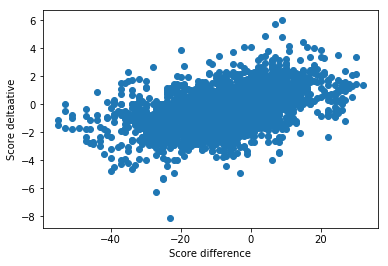

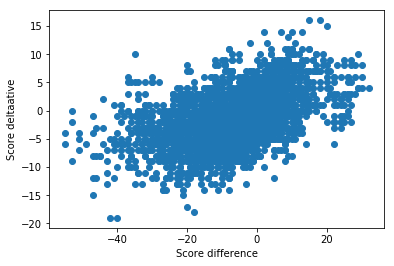

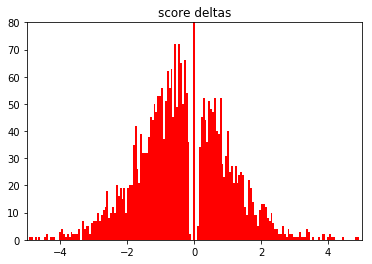